# Imports

In [1]:
# Import standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# API
import requests
import json
import os

# Datetime
import datetime as datetime

In [2]:
# https://github.com/vera-institute/jail-population-data

vera_df = pd.read_csv('https://raw.githubusercontent.com/vera-institute/jail-population-data/master/jail_population.csv')
vera_df.head()

,fips,date,jail_population,county_name,state_name,urbanicity,reporting_jurisdictions,resident_population,jail_incarceration_rate_per_100k
0,1001,2020-01-01,185,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,331.1
1,1001,2020-01-02,184,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,329.3
2,1001,2020-01-03,178,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,318.6
3,1001,2020-01-04,177,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,316.8
4,1001,2020-01-05,183,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,327.6


# EDA

In [3]:
vera_df.shape

(178809, 9)

In [14]:
vera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178809 entries, 0 to 178808
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   fips                              178809 non-null  int64         
 1   date                              178809 non-null  datetime64[ns]
 2   jail_population                   178809 non-null  int64         
 3   county_name                       178734 non-null  object        
 4   state_name                        178664 non-null  object        
 5   urbanicity                        178734 non-null  object        
 6   reporting_jurisdictions           176780 non-null  object        
 7   resident_population               178734 non-null  float64       
 8   jail_incarceration_rate_per_100k  178734 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 12.3+ MB


In [16]:
vera_df['date']=pd.to_datetime(vera_df['date'])
vera_df.head()

,fips,date,jail_population,county_name,state_name,urbanicity,reporting_jurisdictions,resident_population,jail_incarceration_rate_per_100k
0,1001,2020-01-01,185,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,331.1
1,1001,2020-01-02,184,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,329.3
2,1001,2020-01-03,178,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,318.6
3,1001,2020-01-04,177,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,316.8
4,1001,2020-01-05,183,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,327.6


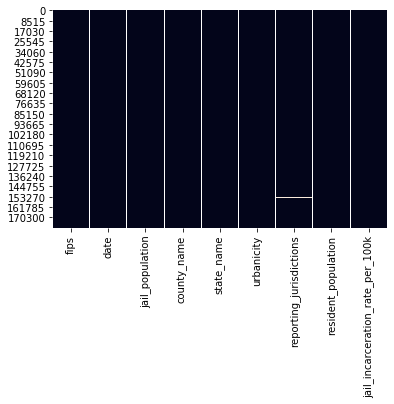

In [13]:
# Check for null values

sns.heatmap(vera_df.isnull(), cbar=False)

# Feature Engineering

In [ ]:
#look into date issue